https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import tensorflow as tf

try:
    import cPickle as pickle
except:
    import pickle

from IPython.display import display, display_html

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
#with pd.option_context('display.float_format', '{:}'.format):

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
##########
# 폰트설정 #
##########
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list.sort()
font_list = filter(lambda x: True if "Apple" in x else False, font_list)
for x in font_list:
    print(x)

/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf
/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf
/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf
/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf
/System/Library/Fonts/Apple Braille.ttf
/System/Library/Fonts/Apple Color Emoji.ttc
/System/Library/Fonts/Apple Symbols.ttf
/System/Library/Fonts/AppleSDGothicNeo.ttc
/System/Library/Fonts/Supplemental/Apple Chancery.ttf
/System/Library/Fonts/Supplemental/AppleGothic.ttf
/System/Library/Fonts/Supplemental/AppleMyungjo.ttf


In [20]:
KoreanFont = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf')
plt.rcParams['font.family'] = KoreanFont.get_name()
plt.rcParams['font.size'] = 12

In [21]:
##########
# 랜덤고정 #
##########
랜덤시드=0

import random
random.seed(랜덤시드)
np.random.seed(랜덤시드)

In [22]:
##########
# 변수정의 #
##########
데이터경로 = '../data/'

---
## 데이터 기초 분석

In [23]:
creditcard = pd.read_csv(데이터경로 + 'creditcard.csv')
display(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 1. 기초 기술통계

In [24]:
#with pd.option_context('display.float_format', '{:.4f}'.format):
display(creditcard.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 데이터 분포도
#### 타겟 클래스 (사기여부)

In [25]:
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

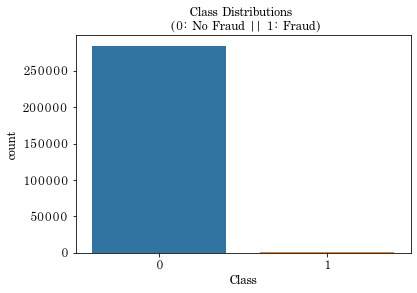

In [26]:
sns.countplot('Class', data=creditcard)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)

#### 거래 금액, 거래 발생 시간
* Time : Number of seconds elapsed between this transaction and the first transaction in the dataset


In [27]:
creditcard.Time.value_counts().sort_index()

0.0         2
1.0         2
2.0         2
4.0         1
7.0         2
           ..
172785.0    1
172786.0    1
172787.0    1
172788.0    2
172792.0    1
Name: Time, Length: 124592, dtype: int64

(0.0, 172792.0)

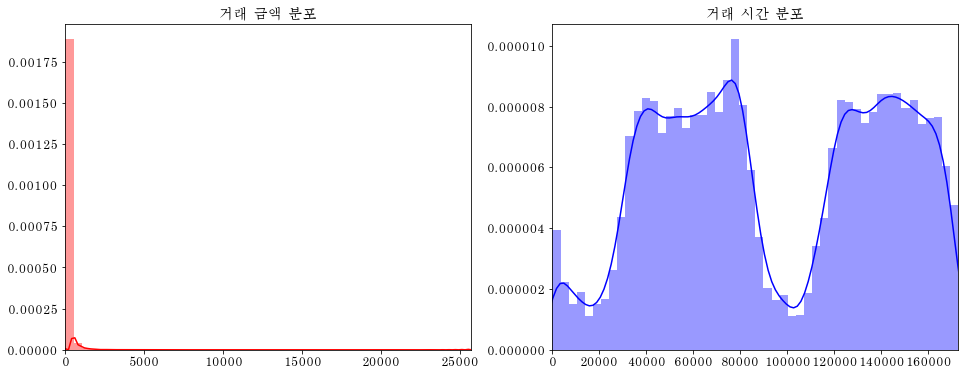

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

v_amt = creditcard['Amount'].values
v_time = creditcard['Time'].values

sns.distplot(v_amt, ax=ax[0], color='r')
ax[0].set_title('거래 금액 분포')
ax[0].set_xlim([min(v_amt), max(v_amt)])

sns.distplot(v_time, ax=ax[1], color='b')
ax[1].set_title('거래 시간 분포')
ax[1].set_xlim([min(v_time), max(v_time)])

기술 통계 : 분포도 그리고, correlation matrix 그리기

---
### 2. 데이터 전처리
V1~V28 변수들은 민감할 수 있는 개인정보를 공개하지 않기 위해 데이터를 제공한 카드사 측에서 PCA로 미리 전처리가 되어있는 상태. 전처리가 안 된 컬럼인 Amount와 Time도 전처리를 해야한다.

또한 극단적으로 불균형한 Fraud 데이터를 제대로 된 학습을 위해 언더샘플링을 통해 Fraud:Non-Fraud 비율이 1:1인 새 데이터 셋을 만들어야 한다.

언더 샘플링을 실행하기 전에 원 비율 그대로 

궁금한 점:
* 학습을 할 때 데이터 밸런싱이 선행되어야 한다는 것은 알겠으나 왜 분석 단계에서 벌써 언더 샘플링을 해야 하나? 일반 거래 패턴이 다양할텐데 그거에 대한 정보량이 너무 줄어드는게 아닌가?
  * 정보량이 줄어들 위험이 있기는 하지만, 제대로 랜덤 샘플링을 했다면 분포는 그대로 유지되기 때문에 Outlier에 대한 데이터를 제외하고는 괜찮을 것
* 데이터 밸런싱은 꼭 1:1로 해야 하는가? 경험상 저게 제일 잘 되던것 같기는 하지만 뭔가 통계적인 이유가 있는가?
* 원래 일반적으로 학습데이터에서 아웃라이어를 제거하는가? https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

### 2-1. Amount와 Time 컬럼 스케일링

In [29]:
from sklearn.preprocessing import RobustScaler #StandardScaler
#Robust Statistics : 아웃라이어에 덜 민감한 방법의 통계 (mean 대신 median을 기준으로 잡는다거나)

rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
creditcard['scaled_time'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1, 1))

creditcard.drop(['Time', 'Amount'], axis=1, inplace=True)


In [30]:
creditcard

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


### 2-2. 학습 / 테스트 데이터 나누기

In [31]:
from sklearn.model_selection import StratifiedKFold

print('정상건 ', round(creditcard['Class'].value_counts()[0]/len(creditcard) * 100,2), '% of the dataset')
print('사기건 ', round(creditcard['Class'].value_counts()[1]/len(creditcard) * 100,2), '% of the dataset')

정상건  99.83 % of the dataset
사기건  0.17 % of the dataset


In [32]:
X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

skf = StratifiedKFold(n_splits=5, random_state=랜덤시드, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("train index: ", len(train_index), "test index: ", len(test_index))
    
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


train index:  227845 test index:  56962
train index:  227845 test index:  56962
train index:  227846 test index:  56961
train index:  227846 test index:  56961
train index:  227846 test index:  56961
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### 2-3. 랜덤 언더 샘플링

The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [33]:
랜덤데이터 = creditcard.sample(frac=1, random_state=랜덤시드)

사기데이터 = 랜덤데이터.loc[랜덤데이터['Class'] == 1]
정상샘플링데이터 = 랜덤데이터.loc[랜덤데이터['Class'] == 0][:492]

샘플링데이터 = pd.concat([사기데이터, 정상샘플링데이터])
샘플링데이터 = 샘플링데이터.sample(frac=1, random_state=랜덤시드)

샘플링데이터.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
74794,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,-0.049233,-0.153131,-0.814310,-1.894796,-0.831483,1.387289,1.188907,0.536817,-0.051403,-1.231386,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,1,4.051003,-0.339901
264755,0.285994,-3.500172,0.120214,2.870073,-2.219233,1.735747,-0.809120,0.517737,1.304203,0.572238,-0.843588,-0.095421,-1.652901,-0.781826,-2.591612,1.292730,-0.278208,0.348355,-0.443393,1.347581,0.495849,-0.060820,-0.444735,-0.340144,-1.153573,2.258126,-0.248557,0.067937,0,10.995319,0.903324
223572,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,-5.653638,3.942316,-5.883724,-1.347814,-9.266120,-2.459556,-2.205644,-5.709087,-1.113937,-1.556530,0.164288,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,1,-0.293440,0.690116
119634,0.364647,-1.868803,0.195291,0.395567,-1.140283,0.370634,-0.015770,-0.027628,1.157162,-0.683766,-1.618061,0.478853,0.640767,-0.588908,-0.213943,0.216853,-0.230232,-0.263339,0.690443,0.948612,-0.007493,-0.815611,-0.467571,-0.500501,0.109927,0.952522,-0.122180,0.087820,0,6.451338,-0.107685
82678,1.277862,-1.218097,0.436517,-1.443919,-0.943716,0.816429,-1.234908,0.338397,-1.845883,1.249644,0.727192,-0.541243,0.093744,-0.108782,1.664313,-1.748267,1.848211,-2.056222,-1.922357,-0.460539,-0.066430,0.302245,0.191320,-0.666031,0.013571,-0.098652,0.096963,0.011778,0,0.111786,-0.295950


In [34]:
샘플링데이터.to_pickle(데이터경로 + '샘플링데이터.pkl')

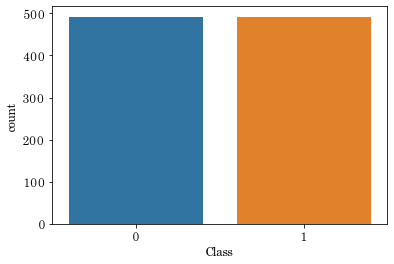

In [35]:
sns.countplot('Class', data=샘플링데이터)

## 3. 데이터 분석
### 3-1. Correlation Matrix

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


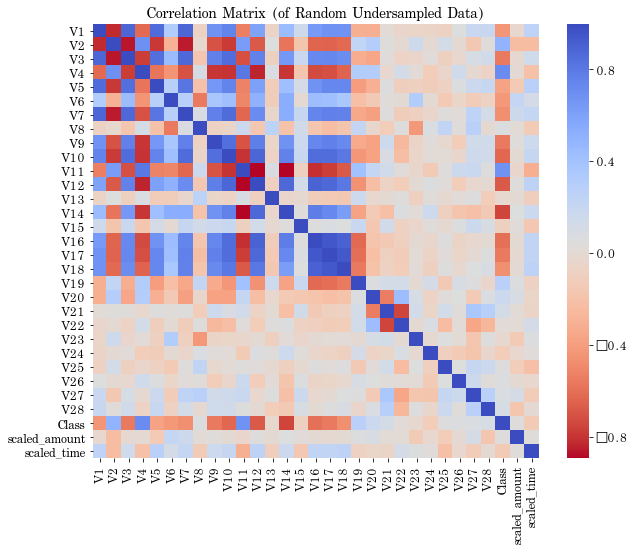

In [36]:
샘플링데이터_corr = 샘플링데이터.corr()
fig = plt.figure(figsize=(10, 8))
fig = sns.heatmap(샘플링데이터_corr, cmap='coolwarm_r', annot_kws={'size':20})
fig.set_title('Correlation Matrix (of Random Undersampled Data)', fontsize=14)
plt.show()

In [37]:
상관관계_양 = ['V2', 'V4', 'V11', 'V19']
상관관계_음 = ['V1', 'V3', 'V5', 'V6',
            'V7', 'V9', 'V10', 'V12',
            'V14', 'V16', 'V17', 'V18']

sns.boxplot은 자동으로 IQR에 속하지 않는 데이터를 outlier로 인식

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


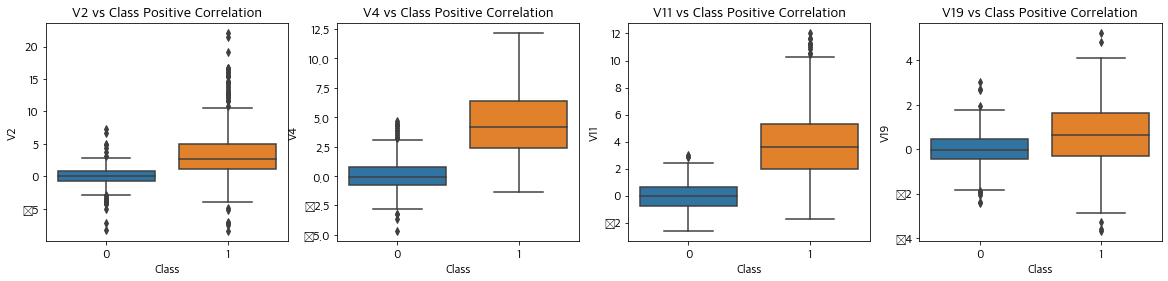

In [72]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

for i, v in enumerate(상관관계_양):
    sns.boxplot(x="Class", y=v, data=샘플링데이터, ax=axes[i])
    axes[i].set_title('%s vs Class Positive Correlation' % v)

plt.show()

/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a60058221/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


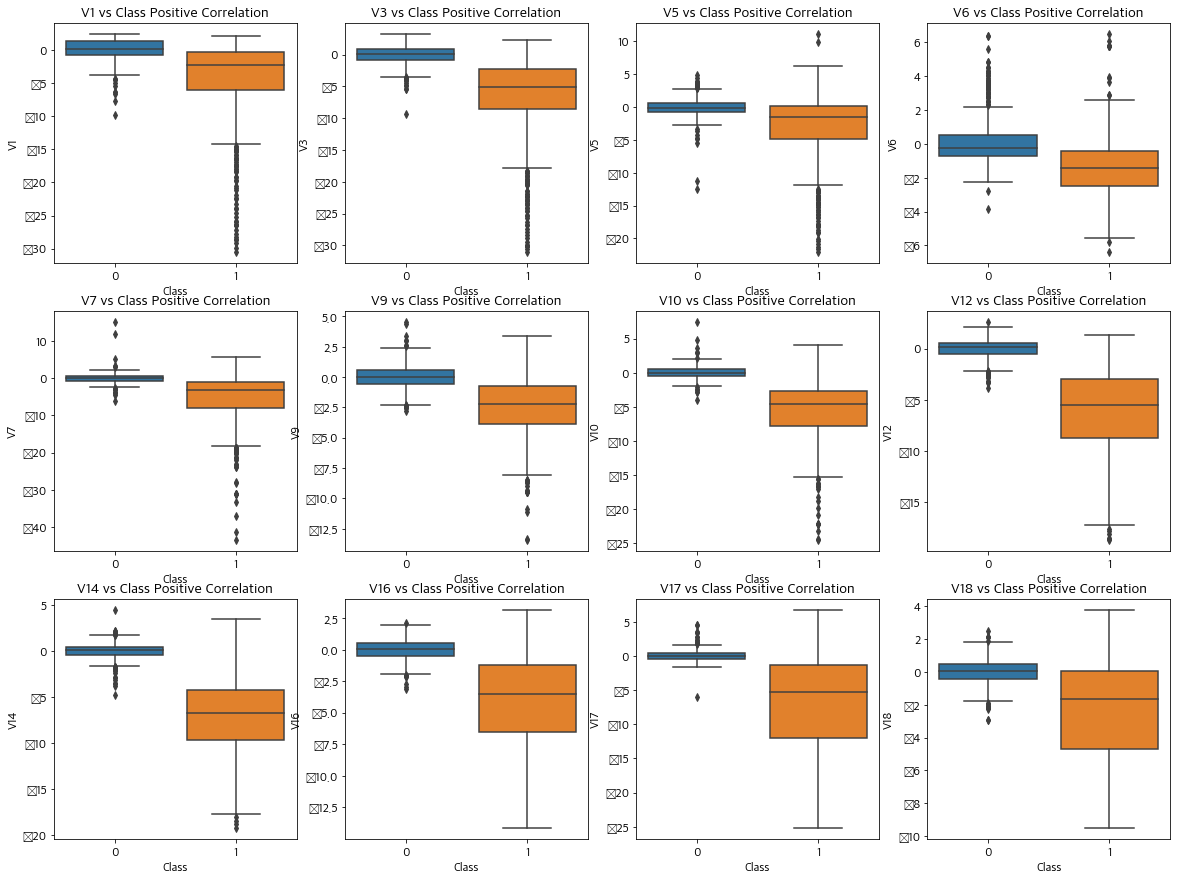

In [77]:
f, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, v in enumerate(상관관계_음):
    sns.boxplot(x="Class", y=v, data=샘플링데이터, ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title('%s vs Class Positive Correlation' % v)

plt.show()

모든 아웃라이어를 제거하는 것은 정보량 소실의 위험이 있으므로, extreme한 outlier만 제거한다 (이 kernel에서 extreme의 기준은 IQR 범위에서 IQR * 1.5 = IQR 극단값에서 IQR Range의 1.5배 넘게 초과하는 값이라고 정의 - 일반적 outlier의 정의라고 한다)

궁금점 :
* 다른 예시에서 보기로는 모든 변수에서 outlier 값을 가지고 있는 데이터만 drop하는 식이었는데 여기는 하나만 해당해도 드롭해버리네. Extreme outlier와 그냥 outlier의 차이 같기는 한데... 이런식으로 드롭하면 데이터가 너무 줄지는 않나?
* outlier를 드롭하고 corr를 다시 재면 결과가 달라질 수도 있지 않을까? outlier의 전처리는 어느 단계에서 이뤄지는게 맞는걸까
* 보니까는 fraud 데이터의 아웃라이어만 제거하고, 일반 데이터의 아웃라이어는 제거하지 않는데.. 맞는 것 같으면서도 명확한 이유를 모르겠다